In [28]:
#importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [29]:
#implementing K-Means 

class KMeans:
    def __init__(self, n_clusters=3, max_iters=100, epsilon=1e-6):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.eps = epsilon  
        self.centroids = None
        self.c = []

    def fit(self, X):
        m, n = X.shape 
        random_i = np.random.choice(m, self.n_clusters, replace= False) 
        self.centroids = X[random_i]

        for e in range(self.max_iters):
            self.c = []
            for i in range(m): 
                min_dist = float('inf')
                cloasest_centroid = None
                for k in range(self.n_clusters): 
                    dist = 0 
                    for j in range(n): 
                        dist += (X[i][j] - self.centroids[k][j]) ** 2
                    if dist < min_dist:
                        min_dist = dist
                        cloasest_centroid = k
                self.c.append(cloasest_centroid)
            self.c = np.array(self.c)

            new_centroids = np.zeros((self.n_clusters, n))
            for k in range(self.n_clusters):
                points = X[self.c == k]
                if len(points) > 0:
                    new_centroids[k] = np.mean(points, axis=0)
                else:
                    new_centroids[k] = X[np.random.choice(m)]

            biggest_move = 0
            for k in range(self.n_clusters):
                move = np.sqrt(np.sum((new_centroids[k] - self.centroids[k]) ** 2))
                if move > biggest_move:
                    biggest_move = move

            self.centroids = new_centroids
            if biggest_move < self.eps:
                print(f"Converged in {e} iterations.")
                break

        return self.centroids, self.c
    



        

    




            
                

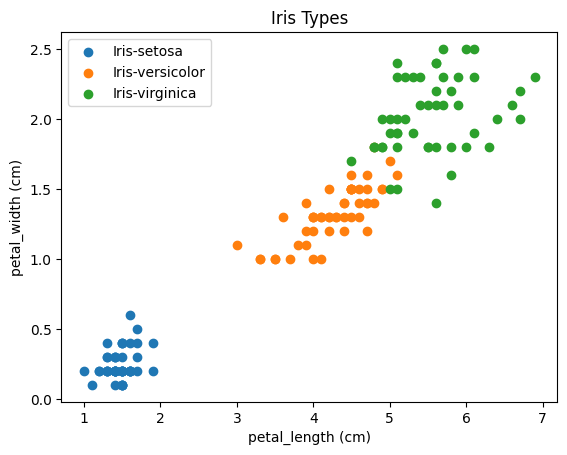

In [30]:
# importing data 


data = pd.read_csv('iris.csv')

data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# List of suppported Iris classes.
iris_types = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Pick the Iris parameters for consideration.
x_axis = 'petal_length'
y_axis = 'petal_width'

# Plot the scatter for every type of Iris.
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['class'] == iris_type],
        data[y_axis][data['class'] == iris_type],
        label=iris_type
    )

# Plot the data.    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Types')
plt.legend()
plt.show()

Converged in 3 iterations.


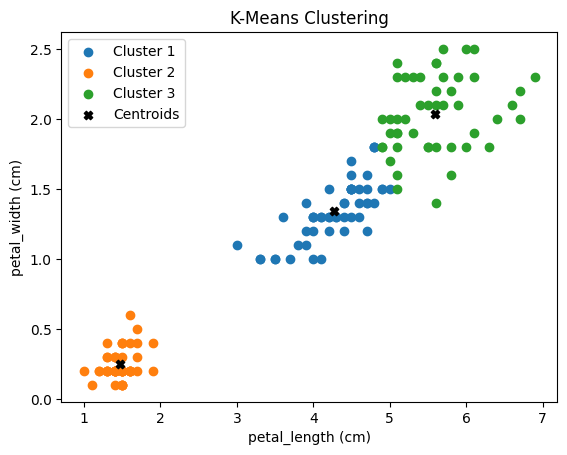

In [37]:

# Using K-Means to cluster the data.

X = data[[x_axis, y_axis]].values
kmeans = KMeans(n_clusters=3, epsilon=1e-12, max_iters=10000)
centroids, c = kmeans.fit(X)
plt.figure()
for k in range(kmeans.n_clusters):
    points = X[c == k]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {k+1}')
plt.scatter(centroids[:, 0], centroids[:, 1],c='black', marker='X', label='Centroids')
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

